In [1]:
import sys, os

folder_path = '../models/'
if folder_path not in sys.path:
    sys.path.append(folder_path)

from cnmp import CNMP
from cnep import CNEP

import numpy as np
import torch
from movement_primitives.promp import ProMP
from movement_primitives.dmp import DMP
from gmr import GMM
import matplotlib.pyplot as plt

In [2]:
root_path = '/home/yigit/projects/cnep/outputs/'
test_path = 'ablation/unimodal/orig_0_1_2_cnmp/1717370718/'

data_path = root_path + test_path + 'y.pt'

Y = torch.load(data_path, map_location='cpu').to('cpu').numpy().squeeze(-1)
x = np.linspace(0, 1, Y.shape[1])
print(f'x: {x.shape}, Y: {Y.shape}')

num_modes = 1
num_demos = Y.shape[0]
num_indiv = Y.shape[0]//num_modes
t_steps = Y.shape[1]

y_min, y_max = np.min(Y), np.max(Y)

Y_means = np.zeros((num_modes,Y.shape[1]))
for i in range(num_modes):
    Y_means[i] = np.mean(Y[i*num_indiv:(i+1)*num_indiv], axis=0)

x: (100,), Y: (24, 100)


In [3]:
num_tests = 50
# xs, ys, indices = random_points_on_demo(num_tests)

# ys = np.clip(ys + (np.random.rand(num_tests, 1)-0.5)*0.05, y_min, y_max)
# print('[', end='')
# for i in range(num_tests):
#     print(xs[i], end=',\n' if i != num_tests-1 else '')
# print(']', end='\n\n')
# print('[', end='')
# for i in range(num_tests):
#     print(ys[i], end=',\n' if i != num_tests-1 else '')
# print(']', end='\n\n')
# print('[', end='')
# for i in range(num_tests):
#     print(indices[i], end=',' if i!=num_tests-1 else '')
# print(']', end='\n')

xs = np.array([[0.09090909],
[0.13131313],
[0.21212121],
[0.45454545],
[0.54545455],
[0.43434343],
[0.1010101],
[0.55555556],
[0.34343434],
[0.15151515],
[0.66666667],
[0.44444444],
[0.55555556],
[0.36363636],
[0.17171717],
[0.55555556],
[0.1010101],
[0.3030303],
[0.60606061],
[0.5959596],
[0.58585859],
[0.06060606],
[0.3030303],
[0.66666667],
[0.28282828],
[0.63636364],
[0.07070707],
[0.08080808],
[0.08080808],
[0.66666667],
[0.50505051],
[0.4040404],
[0.68686869],
[0.68686869],
[0.58585859],
[0.26262626],
[0.16161616],
[0.63636364],
[0.58585859],
[0.57575758],
[0.58585859],
[0.02020202],
[0.41414141],
[0.11111111],
[0.45454545],
[0.48484848],
[0.17171717],
[0.68686869],
[0.39393939],
[0.02020202]])

ys = np.array([[-0.07425869],
[-0.06272091],
[-0.13966974],
[-0.14517228],
[-0.09877855],
[-0.14408719],
[-0.02901017],
[-0.07859868],
[-0.18018857],
[-0.07882198],
[0.03072245],
[-0.13250996],
[-0.12232318],
[-0.18892311],
[-0.09152087],
[-0.08833009],
[-0.01603176],
[-0.1699702],
[-0.07783797],
[-0.04831225],
[-0.02354198],
[-0.02701175],
[-0.17994863],
[0.01183143],
[-0.20882118],
[-0.02133961],
[-0.01079401],
[-0.05203479],
[-0.00179725],
[0.0269946],
[-0.16095328],
[-0.16773946],
[-0.00616534],
[0.01447669],
[-0.08504002],
[-0.12659973],
[-0.11118888],
[-0.01514365],
[-0.09840614],
[-0.09044937],
[-0.10375229],
[0.00643073],
[-0.18150988],
[-0.05194153],
[-0.1788159],
[-0.1320721],
[-0.08337913],
[0.00872486],
[-0.10743911],
[0.0402933]])
indices = np.array([9,13,21,45,54,43,10,55,34,15,66,44,55,36,17,55,10,30,60,59,58,6,30,66,28,63,7,8,8,66,50,40,68,68,58,26,16,63,58,57,58,2,41,11,45,48,17,68,39,2]

                   )


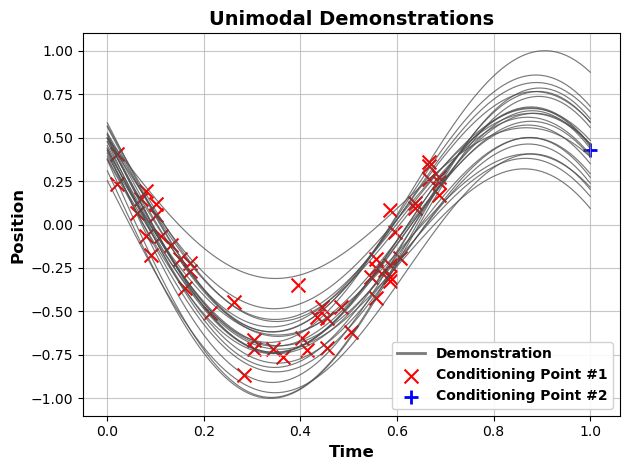

In [4]:
# plot Y and Y_means
# plt.plot(x, Y.T, color='gray', alpha=0.15)
# plt.plot(x, Y_means.T, label='Mean Y', alpha=0.85, linewidth=2)
# plt.legend()
# plt.grid()
# plt.show()

# map Y into -1, 1
Y_norm = (Y - y_min) / (y_max - y_min) * 2 - 1
# map ys into -1, 1
ys_norm = (ys - y_min) / (y_max - y_min) * 2 - 1
# also normalize y_means
Y_means_norm = (Y_means - y_min) / (y_max - y_min) * 2 - 1

from matplotlib.lines import Line2D

dark_gray = '#4d4d4d'
for i in range(Y.shape[0]):
    plt.plot(x, Y_norm[i], color=dark_gray, alpha=0.75, linewidth=0.85)

for i in range(len(indices)):
    lbl = ''
    if i == 0:
        lbl = 'Conditioning Point #1'
    plt.scatter(xs[i], ys_norm[i], color='red', marker='x', s=100, label=lbl)

plt.scatter(1, Y_means_norm[0, -1], color='blue', marker='+', s=100, edgecolor='black', linewidth=2, label='Conditioning Point #2')

plt.title('Unimodal Demonstrations', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Position', fontsize=12, fontweight='bold')

handles = [Line2D([0], [0], color=dark_gray, lw=2, alpha=0.75, label='Demonstration')] + plt.gca().get_legend_handles_labels()[0]

plt.legend(handles=handles, fontsize=12, loc='lower right', frameon=True, framealpha=0.9, prop=dict(weight='bold'))
plt.grid(alpha=0.7)
plt.tight_layout()
plt.savefig(f'plots/unimodal_demonstration.svg', format='svg', dpi=300)
plt.show()

In [5]:
def find_closest_traj_ind(traj, cut=0):
    # find the closest trajectory in the dataset
    min_dist = np.inf
    min_ind = -1
    traj = traj[:-cut] if cut != 0 else traj
    traj_length = traj.shape[0]
    for i, y in enumerate(Y):
        if cut != 0:
            dist = compute_euclidean_dist(y[-traj_length-cut:-cut], traj)  # euclidean distance between two trajectories
        else:
            dist = compute_euclidean_dist(y, traj)
        if dist < min_dist:
            min_dist = dist
            min_ind = i
    return min_ind, min_dist


def compute_euclidean_dist(traj0, traj1):
    traj_length = traj0.shape[np.argmax(traj0.shape)]
    assert traj_length > 10, f"Trajectory length is too short: {traj_length}"
    
    traj0 = traj0.reshape(traj_length)
    traj1 = traj1.reshape(traj_length)

    dist = np.sum(np.sqrt((traj0 - traj1) ** 2))
    coeff = t_steps/traj_length
    return dist * coeff

In [6]:
model_folder = 'saved_models/'
models_path = f'{root_path}{test_path}{model_folder}'

m_path, m0_path, m1_path, m2_path, m3_path = f'{models_path}org.pt', f'{models_path}abl0.pt', f'{models_path}abl1.pt', f'{models_path}abl2.pt', f'{models_path}cnmp.pt'

batch_size = 1
dx, dy = 1, 1
n_max, m_max = 6, 6
t_steps = 100
device = 'cpu'

cnmp = CNMP(dx, dy, n_max, m_max, [128,128], decoder_hidden_dims=[128,128], batch_size=batch_size, device=device)
cnep = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=1, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)
cnep0 = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=1, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)
cnep1 = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=1, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)
cnep2 = CNEP(dx, dy, n_max, m_max, [128,128], num_decoders=1, decoder_hidden_dims=[128, 128], batch_size=batch_size, scale_coefs=True, device=device)

cnep.load_state_dict(torch.load(m_path, map_location='cpu'))
cnep0.load_state_dict(torch.load(m0_path, map_location='cpu'))
cnep1.load_state_dict(torch.load(m1_path, map_location='cpu'))
cnep2.load_state_dict(torch.load(m2_path, map_location='cpu'))
cnmp.load_state_dict(torch.load(m3_path, map_location='cpu'))


# data for testing cnxp
val_obs = torch.zeros((batch_size, n_max, dx+dy), dtype=torch.float32, device=device)
val_tar_x = torch.zeros((batch_size, t_steps, dx), dtype=torch.float32, device=device)
# val_tar_y = torch.zeros((batch_size, t_steps, dy), dtype=torch.float32, device=device)
val_obs_mask = torch.zeros((batch_size, n_max), dtype=torch.bool, device=device)

val_obs.fill_(0)
val_tar_x.fill_(0)
val_obs_mask.fill_(False)

val_obs_mask[0, :2] = True

val_tar_x[0] = torch.linspace(0, 1, t_steps).unsqueeze(1)

In [7]:
def random_points_on_demo(n):
    rand_x = np.zeros((n, 1))
    rand_y = np.zeros((n, 1))
    rand_ind = np.zeros(n)
    for i in range(n):
        rand_ind[i] = np.random.randint(0, t_steps-30)
        rand_x[i] = x[int(rand_ind[i])]
        rand_y[i] = Y[np.random.randint(0, num_demos)][int(rand_ind[i])]
    
    return rand_x, rand_y, rand_ind.astype(int)

def intersection_points_on_demo(n):
    rand_points = np.zeros((n, 2))
    indices = np.zeros(n)

    found = 0
    while found < n:
        rand_ind = np.random.randint(0, t_steps-20) # to avoid the end of the trajectory
        for i in range(num_modes):
            for j in range(num_modes):
                if i==j:
                    continue
                elif np.abs(Y_means[i][rand_ind] - Y_means[j][rand_ind]) < 0.19:
                    if rand_ind in indices:
                        continue
                    else:
                        rand_points[found, 0] = x[rand_ind]
                        rand_points[found, 1] = np.random.uniform(Y_means[i][rand_ind], Y_means[j][rand_ind])
                        indices[found] = rand_ind
                        found += 1

    return rand_points[:, 0].reshape(-1, 1), rand_points[:, 1].reshape(-1, 1), indices.astype(int)

In [8]:
import pickle

with open('rand_unimodal_smp_2_types.pkl', 'rb') as f:
    smp_trajs = pickle.load(f)

# for i in smp_trajs:
#     print(i.shape)

In [9]:
p_ = ProMP(n_dims=1, n_weights_per_dim=10)
p_.imitate(np.tile(x, (num_demos, 1)), Y)

n_comp = 10  # Number of GMM components
gmr_model_ = GMM(n_components=n_comp, random_state=1234)
gmr_model_.from_samples(Y)

In [10]:
from tqdm import tqdm
import copy

import seaborn as sns
from matplotlib.lines import Line2D


colors = [sns.color_palette('tab10')[8], sns.color_palette('tab10')[3], 
          sns.color_palette('tab10')[0], sns.color_palette('tab10')[4], 
          sns.color_palette('tab10')[1]]

linestyles = [(0, (3, 1, 1, 1, 1, 1)), '--', ':', '-.', '-']

y1 = Y_means[:, -1][0]

num_models = 9
# 1: ProMP, 2: GMR, 3: CNMP, 4: StableMP, 5:CNEP, 6: CNEP-MoE, 7: CNEP-A0, 8: CNEP-A1, 9: CNEP-A2

euc_errors = np.zeros((num_tests, num_models))

plot_id = 15

for i0 in tqdm(range(num_tests)):
    plot_id = i0

    p = copy.deepcopy(p_)
    gmr_model = copy.deepcopy(gmr_model_)

    x0 = xs[i0]
    y0 = ys[i0]

    # ProMP
    p = p.condition_position(y0, t=x0).condition_position(y1, t=1)
    trajectory_p = p.sample_trajectories(x, 1, np.random.RandomState(seed=1234))

    # GMR
    gmr_model = gmr_model.condition([indices[i0], -1], [y0[0], y1])
    trajectory_g = gmr_model.sample(1)
    trajectory_g = np.insert(trajectory_g, indices[i0], y0[0])
    trajectory_g = np.append(trajectory_g, y1)

    # CNMP and CNEP
    val_obs[0, :2, :dx] = torch.tensor([x0[0], 1]).unsqueeze(1)
    val_obs[0, :2, dx:] = torch.tensor([y0[0], y1]).unsqueeze(1)

    with torch.no_grad():
        trajectory_cnmp = cnmp.val(val_obs, val_tar_x, val_obs_mask)[:, :, :dy]
        pred_cnep, gate = cnep.val(val_obs, val_tar_x, val_obs_mask)
        dec_id = torch.argmax(gate.squeeze(1), dim=-1)
        trajectory_cnep = pred_cnep[dec_id, 0, :, :dy]

        confs = gate.view(1, 1, 1, 1)
        preds = pred_cnep[:, :, :, :dy]

        weighted_preds = preds * confs  # Element-wise multiplication, shape (4, 1, 200, 1)
        trajectory_cnep_moe = weighted_preds.sum(dim=0, keepdim=True)  # Sum along the first dimension, shape (1, 1, 200, 1)

        pred_cnep0, gate0 = cnep0.val(val_obs, val_tar_x, val_obs_mask)
        dec_id0 = torch.argmax(gate0.squeeze(1), dim=-1)
        trajectory_cnep0 = pred_cnep0[dec_id0, 0, :, :dy]

        pred_cnep1, gate1 = cnep1.val(val_obs, val_tar_x, val_obs_mask)
        dec_id1 = torch.argmax(gate1.squeeze(1), dim=-1)
        trajectory_cnep1 = pred_cnep1[dec_id1, 0, :, :dy]

        pred_cnep2, gate2 = cnep2.val(val_obs, val_tar_x, val_obs_mask)
        dec_id2 = torch.argmax(gate2.squeeze(1), dim=-1)
        trajectory_cnep2 = pred_cnep2[dec_id2, 0, :, :dy]

    # plt.plot(x, trajectory_cnep, color='blue', alpha=0.5)
    # plt.plot(x, trajectory_p[0], color='red', alpha=0.5)

    for j in range(num_models):
        if j == 0:
            traj = trajectory_p.squeeze(0)
            if i0 == plot_id:
                # map to -1, 1
                traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                plt.plot(x, traj_map, color=colors[j], label='ProMP', linewidth=2.5, linestyle=linestyles[j])
        elif j == 1:
            traj = trajectory_g
            if i0 == plot_id:
                # map to -1, 1
                traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                plt.plot(x, traj_map, color=colors[j], label='GMM-GMR', linewidth=2.5, linestyle=linestyles[j])
        elif j == 2:
            traj = trajectory_cnmp.squeeze(0).squeeze(-1).numpy()
            if i0 == plot_id:
                # map to -1, 1
                traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                plt.plot(x, traj_map, color=colors[j], label='CNMP', linewidth=2.5, linestyle=linestyles[j])
        elif j == 3:  # offline test
            traj = smp_trajs[i0]
            if i0 == plot_id:
                # map to -1, 1
                traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                plt.plot(x[indices[i0]:], traj_map, color=colors[j], label='Stable MP', linewidth=2.5, linestyle=linestyles[j])
        elif j == 4:
            traj = trajectory_cnep.squeeze(0).squeeze(-1).numpy()
            if i0 == plot_id:
                # map to -1, 1
                traj_map = 2*(traj-y_min)/(y_max-y_min) - 1
                plt.plot(x, traj_map, color=colors[j], label='CNEP', linewidth=2.5, linestyle=linestyles[j])
        elif j == 5:
            traj = trajectory_cnep_moe.squeeze(0).squeeze(0).squeeze(-1).numpy()
        elif j == 6:
            traj = trajectory_cnep0.squeeze(0).squeeze(-1).numpy()
        elif j == 7:
            traj = trajectory_cnep1.squeeze(0).squeeze(-1).numpy()
        elif j == 8:
            traj = trajectory_cnep2.squeeze(0).squeeze(-1).numpy()

        cut = 0
        if j == 3:
            cut = 2

        closest_traj_ind, closest_dist = find_closest_traj_ind(traj, cut)
        euc_errors[i0, j] = closest_dist / t_steps

        # euc_errors[i0, j] = compute_euclidean_dist(traj, Y[closest_traj_ind], cut) / t_steps

    if i0 == plot_id:
        # map y0, y1 to -1, 1
        y0_map = 2*(y0-y_min)/(y_max-y_min) - 1
        y1_map = 2*(y1-y_min)/(y_max-y_min) - 1
        
        plt.title('Trajectory Generation', fontsize=14, fontweight='bold')
        plt.xlabel('Time', fontsize=12, fontweight='bold')
        plt.ylabel('Position', fontsize=12, fontweight='bold')
        plt.plot(x, Y_norm.T, color='gray', alpha=0.1)
        plt.scatter(x0, y0_map, color='black', marker='*', s=100, label='Conditioning Point', zorder=10)
        plt.scatter(1, y1_map, color='black', marker='*', s=100, zorder=10)

        handles = [Line2D([0], [0], color=dark_gray, lw=2, alpha=0.5, label='Demonstration')] + plt.gca().get_legend_handles_labels()[0]

        plt.legend(handles=handles, fontsize=11, loc='best', frameon=True, framealpha=0.9, prop=dict(weight='bold'))
        plt.grid(alpha=0.7)
        plt.tight_layout()
        plt.ylim(-1.1, 1.1)
        plt.savefig(f'plots/uni_out/unimodal_comparison_{i0}.svg', format='svg', dpi=300)
        plt.clf()


100%|██████████| 50/50 [00:10<00:00,  4.85it/s]


<Figure size 640x480 with 0 Axes>

In [11]:
# print mean errors and standard deviations
# print('RMSE')
# print(np.mean(rmse_errors, axis=0))
# print(np.std(rmse_errors, axis=0))
# print('MAE')
# print(np.mean(mae_errors, axis=0))
# print(np.std(mae_errors, axis=0))
# print('Max error')
# print(np.mean(max_errors, axis=0))
# print(np.std(max_errors, axis=0))
euc_errors *= 2.5  # scaling
print('Euc error')
print(np.mean(euc_errors, axis=0))
print(np.std(euc_errors, axis=0))

Euc error
[0.01736822 0.01712903 0.01481295 0.01608323 0.01491041 0.01491041
 0.01613455 0.01480149 0.01654954]
[0.01035044 0.00882853 0.00569134 0.01435829 0.00461018 0.00461018
 0.00480123 0.00530173 0.00547868]


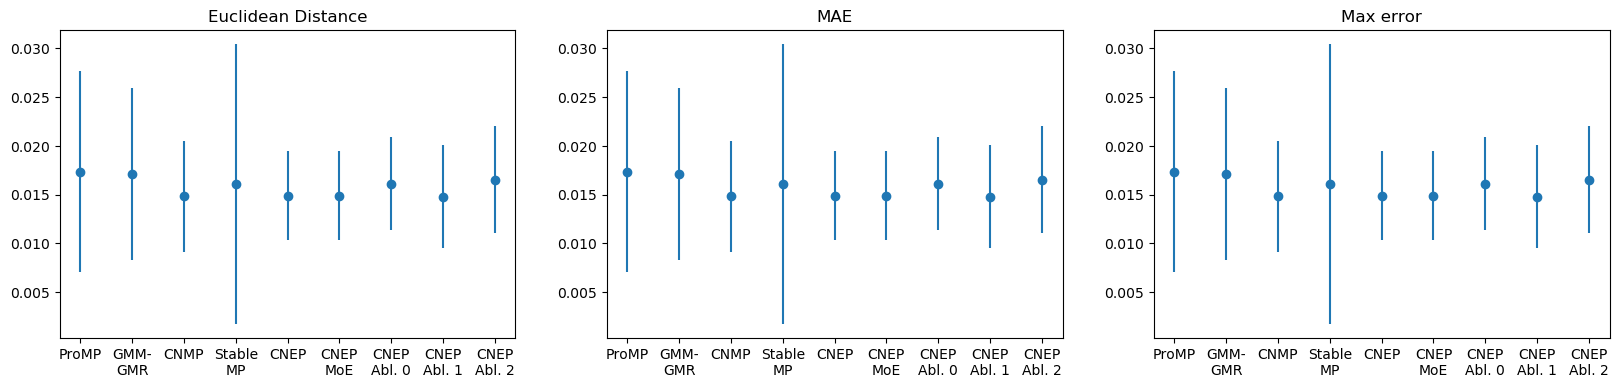

In [12]:
# plot mean errors and standard deviations 
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
x_labels = ['ProMP', 'GMM-\nGMR', 'CNMP', 'Stable\nMP', 'CNEP', 'CNEP\nMoE', 'CNEP\nAbl. 0', 'CNEP\nAbl. 1', 'CNEP\nAbl. 2']
ax[0].errorbar(x_labels, np.mean(euc_errors, axis=0), np.std(euc_errors, axis=0), fmt='o')
ax[0].set_title('Euclidean Distance')
ax[1].errorbar(x_labels, np.mean(euc_errors, axis=0), np.std(euc_errors, axis=0), fmt='o')
ax[1].set_title('MAE')
ax[2].errorbar(x_labels, np.mean(euc_errors, axis=0), np.std(euc_errors, axis=0), fmt='o')
ax[2].set_title('Max error')
plt.show()

# fig, ax = plt.subplots(1, 3, figsize=(20, 4))
# # x_labels = ['DMP', 'ProMP', 'GMR', 'CNMP', 'Stable\nMP', 'CNEP', 'CNEP\nMoE', 'CNEP\nAbl. 0', 'CNEP\nAbl. 1', 'CNEP\nAbl. 2']
# x_labels = ['DMP', 'ProMP', 'GMR', 'CNMP', 'Stable\nMP', 'CNEP']
# ax[0].errorbar(x_labels, np.mean(rmse_errors, axis=0), np.std(rmse_errors, axis=0), fmt='o')
# ax[0].set_title('RMSE')
# ax[1].errorbar(x_labels, np.mean(mae_errors, axis=0), np.std(mae_errors, axis=0), fmt='o')
# ax[1].set_title('MAE')
# ax[2].errorbar(x_labels, np.mean(max_errors, axis=0), np.std(max_errors, axis=0), fmt='o')
# ax[2].set_title('Max error')
# plt.show()

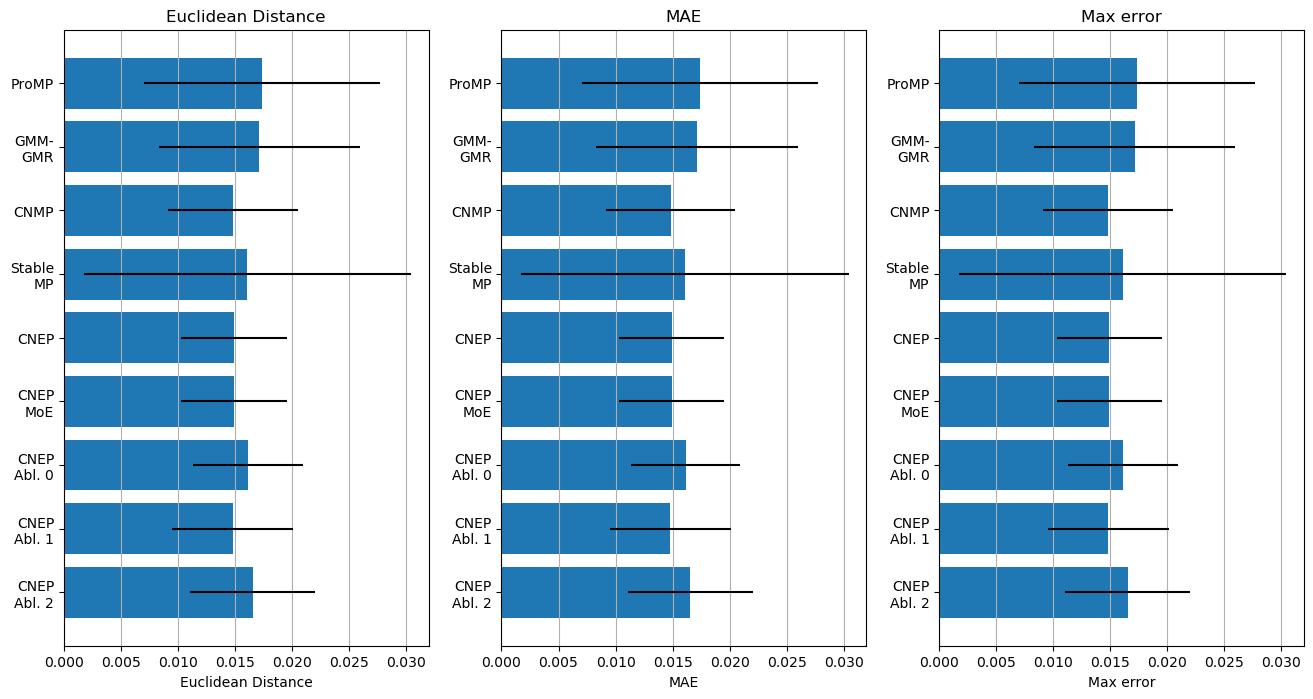

In [13]:
# plot mean errors and standard deviations as horizontal bars
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
y_pos = np.arange(len(x_labels))
ax[0].barh(y_pos, np.mean(euc_errors, axis=0), xerr=np.std(euc_errors, axis=0), align='center')
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(x_labels)
ax[0].invert_yaxis()
ax[0].set_xlabel('Euclidean Distance')
ax[0].set_title('Euclidean Distance')
ax[1].barh(y_pos, np.mean(euc_errors, axis=0), xerr=np.std(euc_errors, axis=0), align='center')
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(x_labels)
ax[1].invert_yaxis()
ax[1].set_xlabel('MAE')
ax[1].set_title('MAE')
ax[2].barh(y_pos, np.mean(euc_errors, axis=0), xerr=np.std(euc_errors, axis=0), align='center')
ax[2].set_yticks(y_pos)
ax[2].set_yticklabels(x_labels)
ax[2].invert_yaxis()
ax[2].set_xlabel('Max error')
ax[2].set_title('Max error')

ax[0].grid(axis='x')
ax[1].grid(axis='x')
ax[2].grid(axis='x')
plt.show()